In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv(r"C:\Users\LENOVO\Dropbox\PC\Downloads\hospital_readmissions.csv\hospital_readmissions.csv")

In [4]:
df.head(10)

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
5,[40-50),2,51,0,10,0,0,0,Missing,Other,Other,Other,no,no,no,no,yes
6,[50-60),4,44,2,21,0,0,0,Missing,Injury,Other,Other,no,normal,yes,yes,no
7,[60-70),1,19,6,16,0,0,1,Other,Circulatory,Other,Other,no,no,no,yes,yes
8,[80-90),4,67,3,13,0,0,0,InternalMedicine,Digestive,Other,Other,no,no,no,no,yes
9,[70-80),8,37,1,18,0,0,0,Family/GeneralPractice,Respiratory,Respiratory,Other,no,no,yes,yes,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [6]:
df.isna().any()

age                  False
time_in_hospital     False
n_lab_procedures     False
n_procedures         False
n_medications        False
n_outpatient         False
n_inpatient          False
n_emergency          False
medical_specialty    False
diag_1               False
diag_2               False
diag_3               False
glucose_test         False
A1Ctest              False
change               False
diabetes_med         False
readmitted           False
dtype: bool

No missing values in our dataset.

In [7]:
df.nunique()

age                    6
time_in_hospital      14
n_lab_procedures     109
n_procedures           7
n_medications         70
n_outpatient          23
n_inpatient           16
n_emergency           21
medical_specialty      7
diag_1                 8
diag_2                 8
diag_3                 8
glucose_test           3
A1Ctest                3
change                 2
diabetes_med           2
readmitted             2
dtype: int64

In [8]:
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [9]:
df.corr()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
time_in_hospital,1.000000,0.328326,0.179249,0.449415,-0.011309,0.076916,-0.013115
n_lab_procedures,0.328326,1.000000,0.048827,0.271741,-0.004309,0.043713,-0.004929
n_procedures,0.179249,0.048827,1.000000,0.368681,-0.034796,-0.069078,-0.042906
n_medications,0.449415,0.271741,0.368681,1.000000,0.043185,0.065572,0.012944
n_outpatient,-0.011309,-0.004309,-0.034796,0.043185,1.000000,0.127736,0.096912
n_inpatient,0.076916,0.043713,-0.069078,0.065572,0.127736,1.000000,0.220285
n_emergency,-0.013115,-0.004929,-0.042906,0.012944,0.096912,0.220285,1.000000


<AxesSubplot:title={'center':'Hospital Readmission data'}>

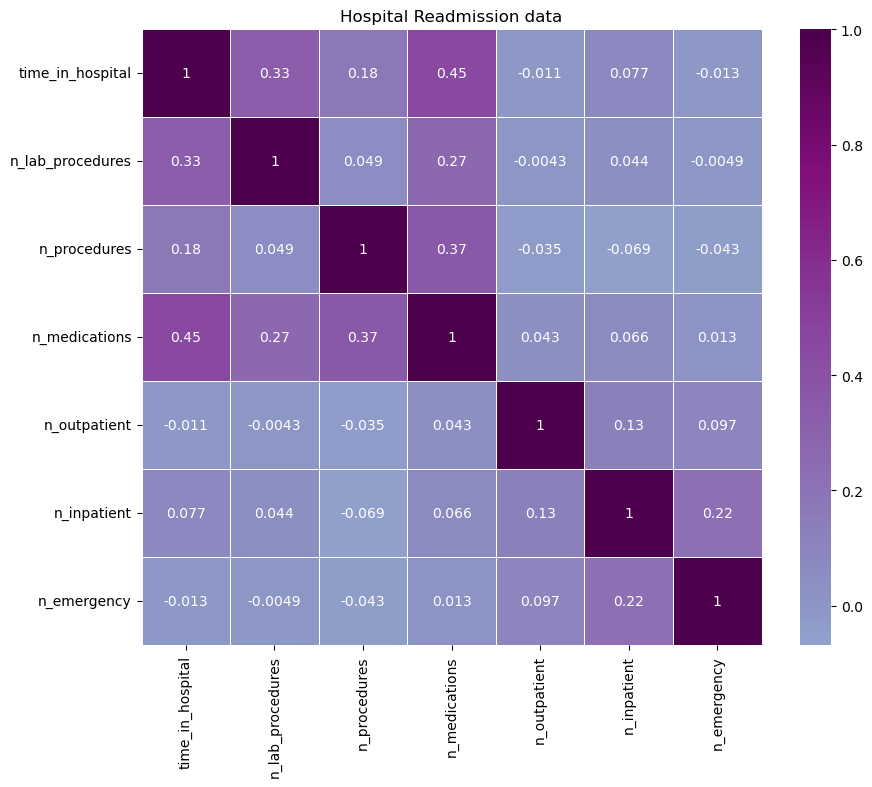

In [10]:
plt.rcParams['figure.figsize']=(10,8)
corr=df.corr()
plt.title('Hospital Readmission data')
sns.heatmap(data=corr,annot=True,cmap='BuPu',linewidths=.5,center=0)

In [11]:
df['age'].value_counts()

[70-80)     6837
[60-70)     5913
[80-90)     4516
[50-60)     4452
[40-50)     2532
[90-100)     750
Name: age, dtype: int64

In [12]:
# Replace the parentheses with brackets in the age column
df['age'] = df['age'].str.replace('(', '[').str.replace(')', ']')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12684\533557244.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['age'] = df['age'].str.replace('(', '[').str.replace(')', ']')


In [13]:
age_count = df['age'].value_counts()

In [14]:
# Sort the age column in ascending order
df.sort_values(by='age').head(5)

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
22046,[40-50],1,19,6,9,0,1,0,Missing,Circulatory,Injury,Other,no,no,no,yes,no
17056,[40-50],7,67,1,17,0,1,0,Missing,Respiratory,Other,Respiratory,no,high,no,no,yes
7392,[40-50],5,50,6,22,0,0,0,Family/GeneralPractice,Circulatory,Circulatory,Respiratory,no,no,yes,yes,no
2018,[40-50],2,46,0,20,0,3,0,Missing,Other,Other,Other,no,no,no,yes,no
14127,[40-50],3,50,2,21,0,1,0,Missing,Injury,Diabetes,Other,no,no,no,no,yes


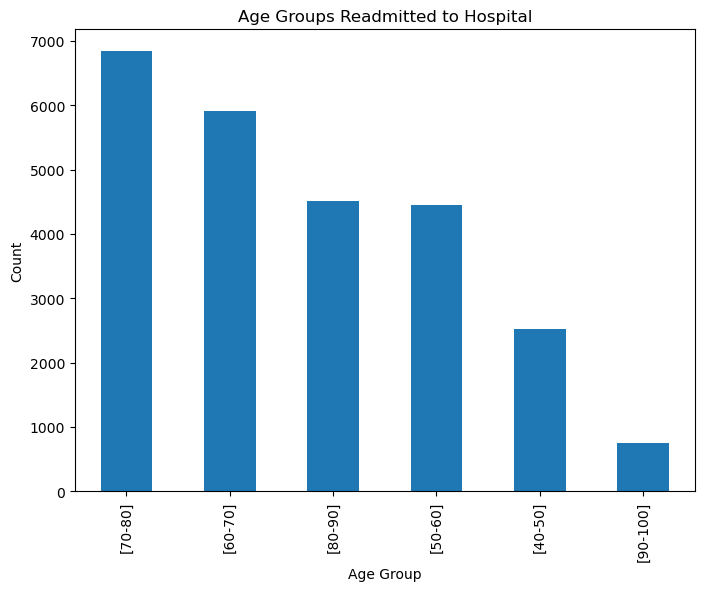

In [15]:
plt.figure(figsize=(8, 6))
# Create a bar chart of the age groups
age_count.plot(kind='bar')

# Add a title and labels for the x and y axes
plt.title('Age Groups Readmitted to Hospital')
plt.xlabel('Age Group')
plt.ylabel('Count')
# Show the plot
plt.show()

It can be found out that age groups between 70-80 tend to readmit to hospitals more often.

In [16]:
df['time_in_hospital'].describe()

count    25000.00000
mean         4.45332
std          3.00147
min          1.00000
25%          2.00000
50%          4.00000
75%          6.00000
max         14.00000
Name: time_in_hospital, dtype: float64

In [17]:
df['time_in_hospital'].value_counts()

3     4311
2     3986
1     3480
4     3467
5     2542
6     1895
7     1467
8     1104
9      768
10     588
11     458
12     354
13     299
14     281
Name: time_in_hospital, dtype: int64

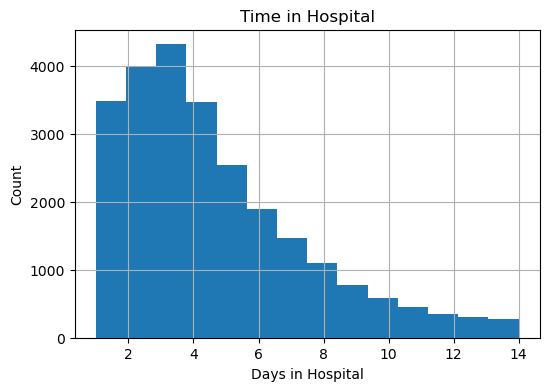

In [18]:
plt.figure(figsize=(6, 4))
# Create a histogram of the values in time_in_hospital
df['time_in_hospital'].hist(bins=14)

# Add a title and labels for the x and y axes
plt.title('Time in Hospital')
plt.xlabel('Days in Hospital')
plt.ylabel('Count')

# Show the plot
plt.show()

It is clearly visible that most of the patients spend 3 days in a hospital.

In [19]:
age_groups = df.groupby('age')['time_in_hospital'].mean()

# Print the average time_in_hospital for each age group
print(age_groups)

age
[40-50]     4.011453
[50-60]     4.154537
[60-70]     4.384407
[70-80]     4.599093
[80-90]     4.813773
[90-100]    4.762667
Name: time_in_hospital, dtype: float64


Each age group spend an average of 4 days in a hospital for treatment.

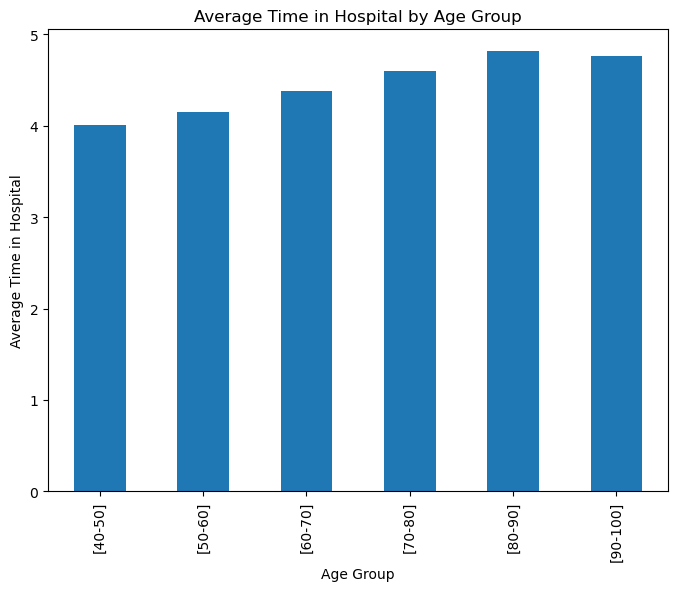

In [20]:
plt.figure(figsize=(6, 4))
# Plot a bar chart of the average time_in_hospital for each age group
age_groups.plot(kind='bar', figsize=(8,6))

# Set the title and axis labels
plt.title('Average Time in Hospital by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Time in Hospital')

# Show the plot
plt.show()

Age between 80-90 spend an averaage of 4.81 days in the hospital.

In [21]:
df['n_procedures'].value_counts()

0    11409
1     5098
2     3064
3     2395
6     1227
4      999
5      808
Name: n_procedures, dtype: int64

Procedures upto 5 are done during the hospital stay in 14 days.

In [22]:
# Group the data by age and calculate the mean n_procedures for each age group
age_groups_procedures = df.groupby('age')['n_procedures'].mean()

# Print the average number of procedures for each age group
print(age_groups_procedures)

age
[40-50]     1.298578
[50-60]     1.518868
[60-70]     1.599696
[70-80]     1.376042
[80-90]     0.969442
[90-100]    0.685333
Name: n_procedures, dtype: float64


In [23]:
# Group the data by n_procedures and calculate the mean time_in_hospital for each group
procedures_groups_time = df.groupby('n_procedures')['time_in_hospital'].mean()

# Print the average time in hospital for each number of procedures
print(procedures_groups_time)

n_procedures
0    3.860549
1    4.550216
2    5.118799
3    5.025887
4    5.435435
5    5.451733
6    5.325998
Name: time_in_hospital, dtype: float64


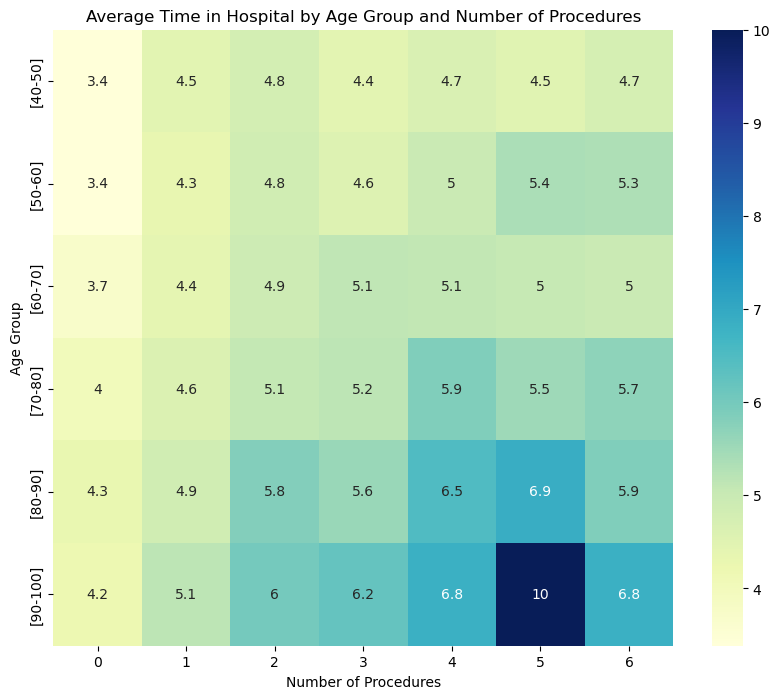

In [24]:
# Group the data by age and n_procedures and calculate the mean time_in_hospital for each group
age_procedure_groups_time = df.groupby(['age', 'n_procedures'])['time_in_hospital'].mean().unstack()

# Plot a heatmap of the average time_in_hospital for each age group and number of procedures
plt.figure(figsize=(10, 8))
sns.heatmap(age_procedure_groups_time, annot=True, cmap='YlGnBu')

# Set the title and axis labels
plt.title('Average Time in Hospital by Age Group and Number of Procedures')
plt.xlabel('Number of Procedures')
plt.ylabel('Age Group')

# Show the plot
plt.show()


This heatmap shows the average time spent in the hospital for each age group and number of procedures, with darker colors indicating longer hospital stays. You can see that in general, patients who have had more procedures tend to have longer hospital stays, and this effect is most pronounced in the older age groups.

In [25]:
# Group the data by age and calculate the sum n_lab_procedures for each age group
age_groups_lab_procedures = df.groupby('age')['n_lab_procedures'].sum()

# Print the average number of lab_procedures for each age group
print(age_groups_lab_procedures)

age
[40-50]     108763
[50-60]     189164
[60-70]     251877
[70-80]     297951
[80-90]     200283
[90-100]     32981
Name: n_lab_procedures, dtype: int64


Most of the lab procedures are done by the age group of 40-50 and the least by 90-100.

In [26]:
# Group the data by age and calculate the mean n_procedures for each age group
age_groups_lab_procedures = df.groupby('age')['n_lab_procedures'].mean()

# Print the average number of procedures for each age group
print(age_groups_lab_procedures)

age
[40-50]     42.955371
[50-60]     42.489668
[60-70]     42.597159
[70-80]     43.579201
[80-90]     44.349646
[90-100]    43.974667
Name: n_lab_procedures, dtype: float64


But the average lab_procedures done is highest for the age group of 80-90.

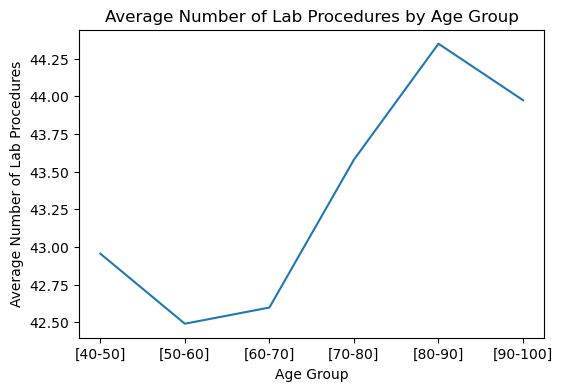

In [27]:
plt.figure(figsize=(6, 4))
# Plot a line chart of the average number of lab procedures for each age group
plt.plot(age_groups_lab_procedures.index, age_groups_lab_procedures.values)

# Set the title and axis labels
plt.title('Average Number of Lab Procedures by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Number of Lab Procedures')

# Show the plot
plt.show()

In [28]:
df['n_medications'].value_counts()

12    1509
15    1469
13    1459
11    1396
14    1396
      ... 
68       2
79       1
72       1
75       1
64       1
Name: n_medications, Length: 70, dtype: int64

In [29]:
# Create a list of the numerical columns to include in the DataFrame
cols = ['n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']

# Calculate the mean values for each age group and store in a dictionary
age_group_means = {}
for age_group in df['age'].unique():
    group_data = df[df['age'] == age_group]
    age_group_means[age_group] = group_data[cols].mean()

# Create a new DataFrame with the mean values for all age groups
df_age = pd.DataFrame.from_dict(age_group_means, orient='index', columns=cols)

# Print the resulting DataFrame
print(df_age)

          n_lab_procedures  n_procedures  n_medications  n_outpatient  \
[70-80]          43.579201      1.376042      16.361416      0.396519   
[50-60]          42.489668      1.518868      16.699461      0.327044   
[60-70]          42.597159      1.599696      17.223068      0.375782   
[40-50]          42.955371      1.298578      15.316351      0.302133   
[80-90]          44.349646      0.969442      15.295616      0.400797   
[90-100]         43.974667      0.685333      13.873333      0.261333   

          n_inpatient  n_emergency  
[70-80]      0.601141     0.135147  
[50-60]      0.611860     0.229560  
[60-70]      0.607475     0.160325  
[40-50]      0.720774     0.395735  
[80-90]      0.604517     0.147254  
[90-100]     0.557333     0.138667  


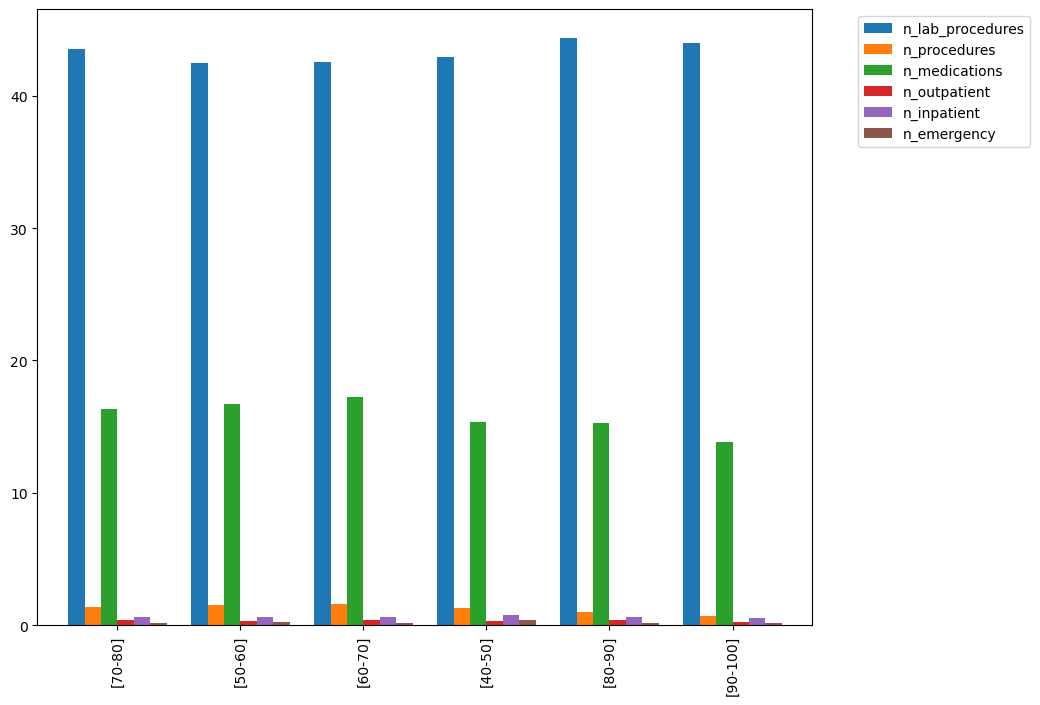

In [30]:
# create the chart
fig, ax = plt.subplots()
df_age.plot(kind='bar', ax=ax,width=0.8)

# move the legend outside the chart and to the right
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# show the chart
plt.show()

In [31]:
df['medical_specialty'].value_counts()

Missing                   12382
InternalMedicine           3565
Other                      2664
Emergency/Trauma           1885
Family/GeneralPractice     1882
Cardiology                 1409
Surgery                    1213
Name: medical_specialty, dtype: int64

In [32]:
specialty_counts = df['medical_specialty'].value_counts()
specialty_percentages = (specialty_counts / specialty_counts.sum()) * 100
print(specialty_percentages)

Missing                   49.528
InternalMedicine          14.260
Other                     10.656
Emergency/Trauma           7.540
Family/GeneralPractice     7.528
Cardiology                 5.636
Surgery                    4.852
Name: medical_specialty, dtype: float64


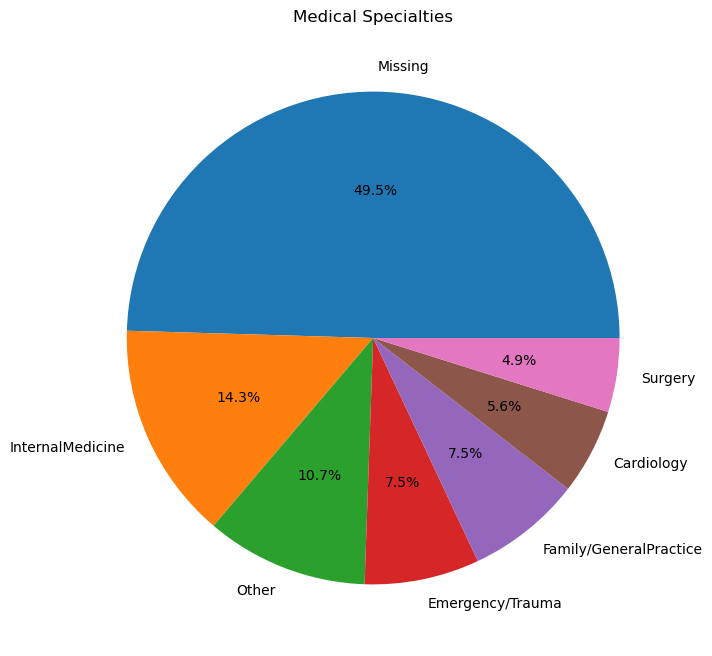

In [33]:
plt.pie(specialty_percentages, labels=specialty_percentages.index, autopct='%1.1f%%')
plt.title("Medical Specialties")
plt.show()

In [34]:
df['diag_1'].value_counts()

Circulatory        7824
Other              6498
Respiratory        3680
Digestive          2329
Diabetes           1747
Injury             1666
Musculoskeletal    1252
Missing               4
Name: diag_1, dtype: int64

In [35]:
df['diag_2'].value_counts()

Other              9056
Circulatory        8134
Diabetes           2906
Respiratory        2872
Digestive           973
Injury              591
Musculoskeletal     426
Missing              42
Name: diag_2, dtype: int64

In [36]:
df['diag_3'].value_counts()

Other              9107
Circulatory        7686
Diabetes           4261
Respiratory        1915
Digestive           916
Injury              464
Musculoskeletal     455
Missing             196
Name: diag_3, dtype: int64

In [37]:
# Combine the three diagnosis columns into one
diagnoses = pd.concat([df['diag_1'], df['diag_2'], df['diag_3']])

# Get the count of each diagnosis
diagnosis_counts = diagnoses.value_counts()

# Print the diagnoses
print(diagnosis_counts)

Other              24661
Circulatory        23644
Diabetes            8914
Respiratory         8467
Digestive           4218
Injury              2721
Musculoskeletal     2133
Missing              242
dtype: int64


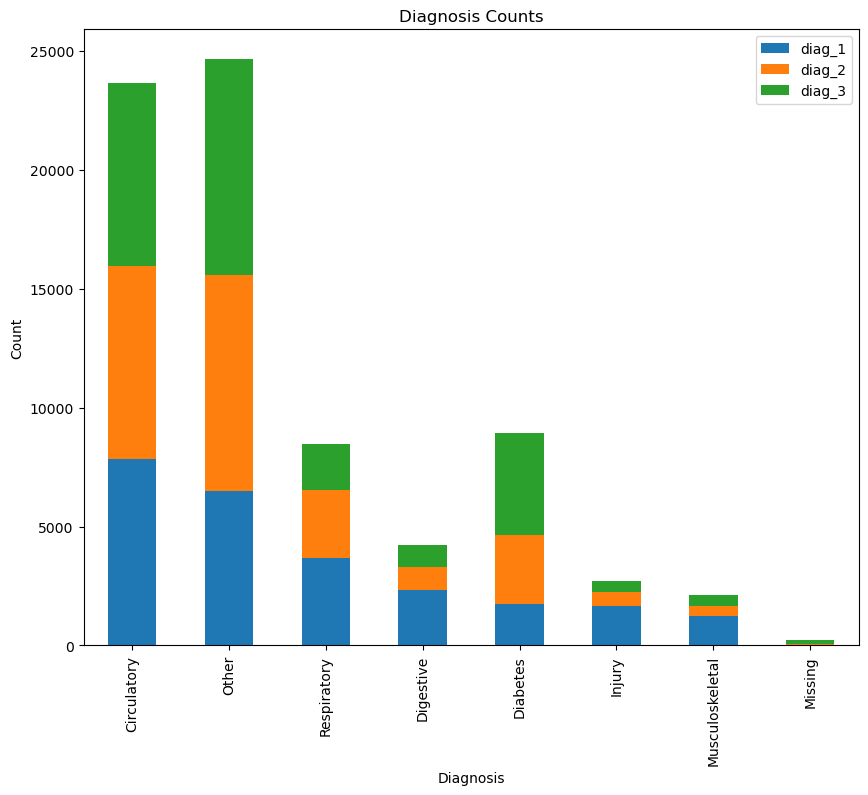

In [38]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each diagnosis in each column
diag1_counts = df['diag_1'].value_counts()
diag2_counts = df['diag_2'].value_counts()
diag3_counts = df['diag_3'].value_counts()

# Combine the diagnosis counts into a single DataFrame
diag_counts = pd.concat([diag1_counts, diag2_counts, diag3_counts], axis=1)
diag_counts.columns = ['diag_1', 'diag_2', 'diag_3']
diag_counts = diag_counts.fillna(0)

# Plot a stacked bar chart of the diagnosis counts
diag_counts.plot.bar(stacked=True)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis Counts')
plt.show()

In [39]:
# Group the data by age and diagnosis columns and count the occurrences
diag1_by_age = df.groupby(['age', 'diag_1'])['diag_1'].count().unstack()
diag2_by_age = df.groupby(['age', 'diag_2'])['diag_2'].count().unstack()
diag3_by_age = df.groupby(['age', 'diag_3'])['diag_3'].count().unstack()

# Print the data
print(diag1_by_age)
print(diag2_by_age)
print(diag3_by_age)

diag_1    Circulatory  Diabetes  Digestive  Injury  Missing  Musculoskeletal  \
age                                                                            
[40-50]         504.0     369.0      271.0   162.0      NaN            100.0   
[50-60]        1256.0     393.0      442.0   273.0      NaN            230.0   
[60-70]        1962.0     385.0      554.0   400.0      1.0            373.0   
[70-80]        2392.0     385.0      585.0   444.0      1.0            373.0   
[80-90]        1482.0     181.0      402.0   321.0      2.0            168.0   
[90-100]        228.0      34.0       75.0    66.0      NaN              8.0   

diag_1     Other  Respiratory  
age                            
[40-50]    750.0        376.0  
[50-60]   1164.0        694.0  
[60-70]   1402.0        836.0  
[70-80]   1693.0        964.0  
[80-90]   1269.0        691.0  
[90-100]   220.0        119.0  
diag_2    Circulatory  Diabetes  Digestive  Injury  Missing  Musculoskeletal  \
age                    

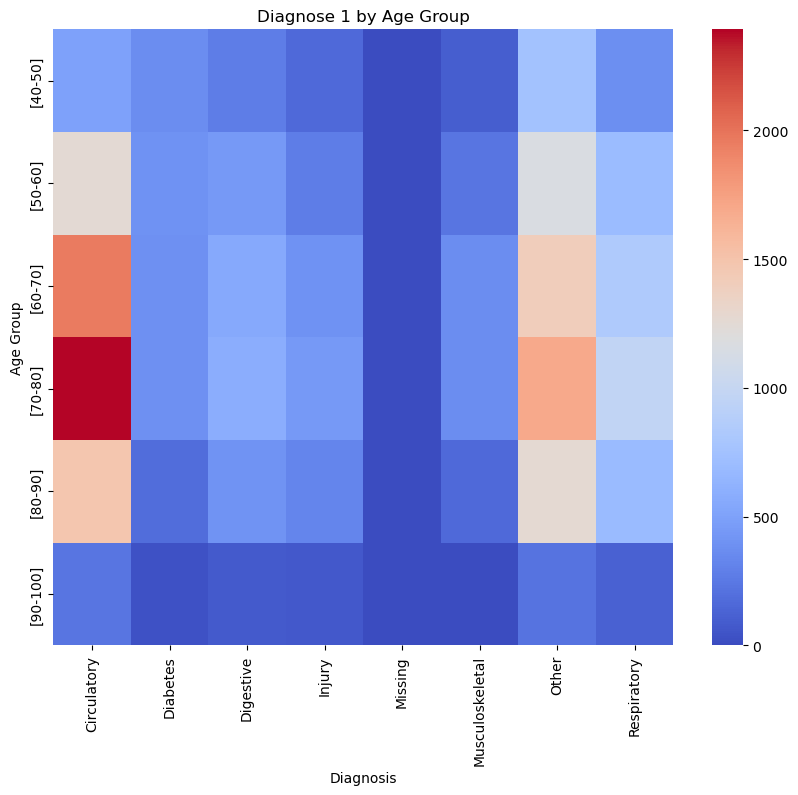

In [40]:
# create a pivot table of diagnoses by age group
diag_pivot = df.groupby(['age', 'diag_1']).size().unstack(fill_value=0)

# plot the heatmap
sns.heatmap(diag_pivot, cmap='coolwarm')

plt.title('Diagnose 1 by Age Group')
plt.xlabel('Diagnosis')
plt.ylabel('Age Group')

plt.show()

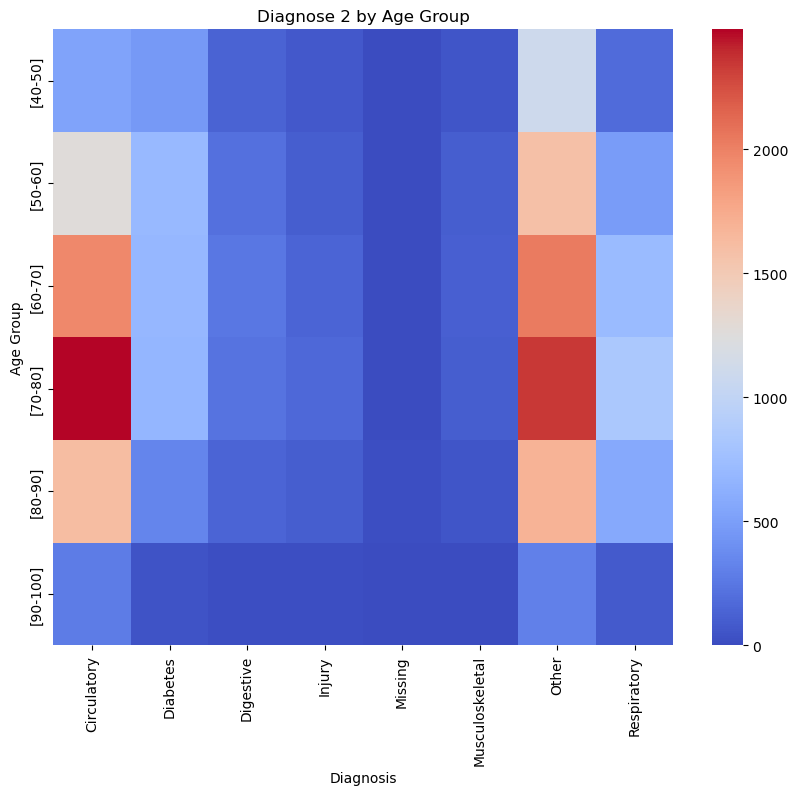

In [41]:
# create a pivot table of diagnoses by age group
diag_pivot = df.groupby(['age', 'diag_2']).size().unstack(fill_value=0)

# plot the heatmap
sns.heatmap(diag_pivot, cmap='coolwarm')

plt.title('Diagnose 2 by Age Group')
plt.xlabel('Diagnosis')
plt.ylabel('Age Group')

plt.show()

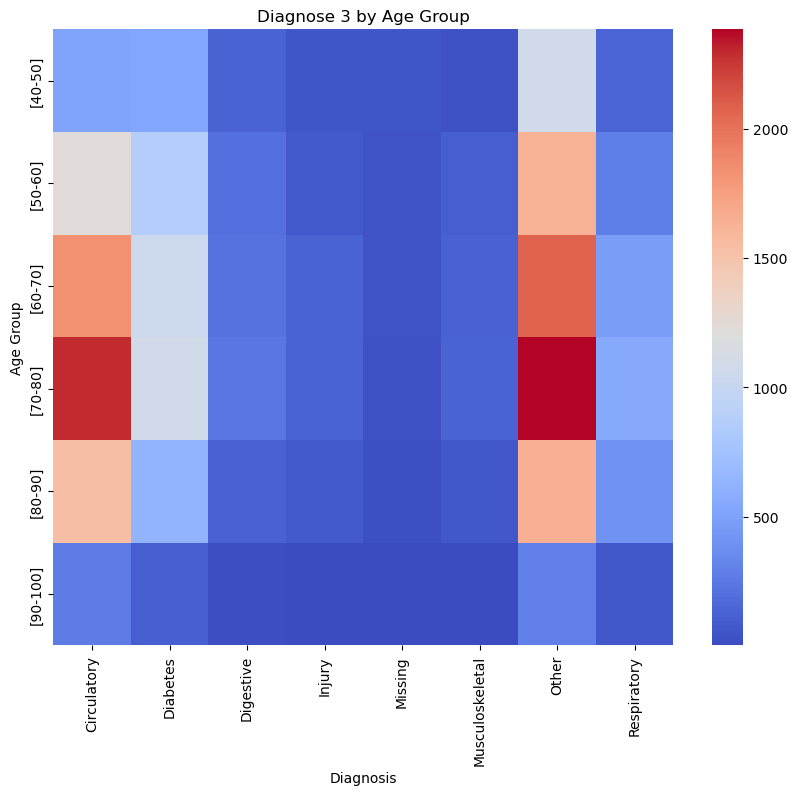

In [42]:
# create a pivot table of diagnoses by age group
diag_pivot = df.groupby(['age', 'diag_3']).size().unstack(fill_value=0)

# plot the heatmap
sns.heatmap(diag_pivot, cmap='coolwarm')

plt.title('Diagnose 3 by Age Group')
plt.xlabel('Diagnosis')
plt.ylabel('Age Group')

plt.show()

In [43]:
df['glucose_test'].value_counts()

no        23625
normal      689
high        686
Name: glucose_test, dtype: int64

In [44]:
age_glucose = df.groupby(['age', 'glucose_test'])['glucose_test'].count().unstack()

In [45]:
age_glucose

glucose_test,high,no,normal
age,,,
[40-50],82,2391,59
[50-60],88,4264,100
[60-70],127,5643,143
[70-80],198,6442,197
[80-90],156,4201,159
[90-100],35,684,31


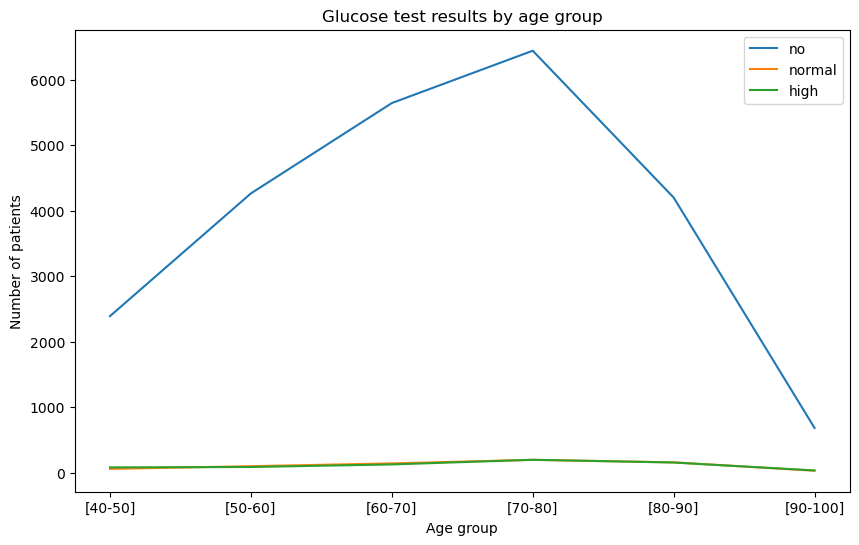

In [46]:
# Set up line chart
fig, ax = plt.subplots(figsize=(10,6))

# Plot each category as a line
ax.plot(age_glucose.index, age_glucose['no'], label='no')
ax.plot(age_glucose.index, age_glucose['normal'], label='normal')
ax.plot(age_glucose.index, age_glucose['high'], label='high')

# Set chart title and axis labels
ax.set_title('Glucose test results by age group')
ax.set_xlabel('Age group')
ax.set_ylabel('Number of patients')

# Add legend
ax.legend()

plt.show()

In [47]:
df['A1Ctest'].value_counts()

no        20938
high       2827
normal     1235
Name: A1Ctest, dtype: int64

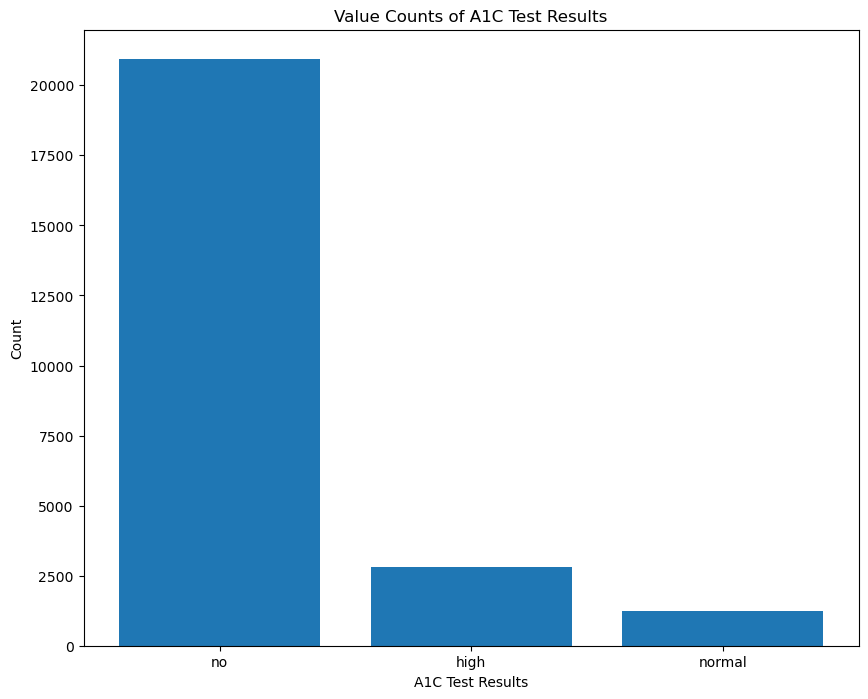

In [48]:
# plot bar chart of value counts for 'A1Ctest' column
plt.bar(df['A1Ctest'].value_counts().index, df['A1Ctest'].value_counts().values)

# set title and axis labels
plt.title('Value Counts of A1C Test Results')
plt.xlabel('A1C Test Results')
plt.ylabel('Count')

# display plot
plt.show()

In [49]:
df['change'].value_counts()

no     13497
yes    11503
Name: change, dtype: int64

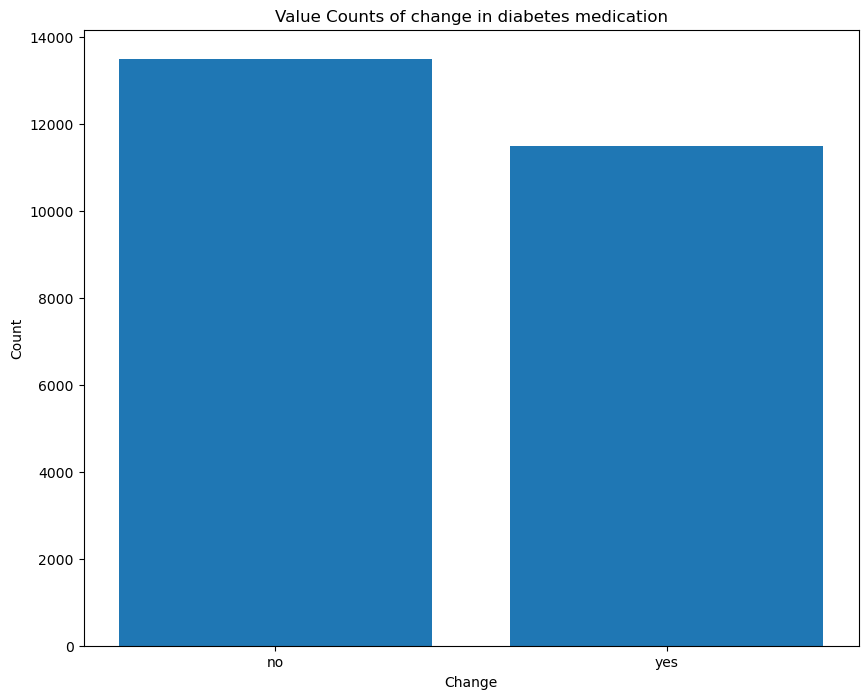

In [50]:
# plot bar chart of value counts for 'A1Ctest' column
plt.bar(df['change'].value_counts().index, df['change'].value_counts().values)

# set title and axis labels
plt.title('Value Counts of change in diabetes medication')
plt.xlabel('Change')
plt.ylabel('Count')

# display plot
plt.show()

It is notable that there is more number of diabetes patient who has no change in the medication. But there is a considerable amount of patients with change in medication as well.

In [51]:
df['diabetes_med'].value_counts()

yes    19228
no      5772
Name: diabetes_med, dtype: int64

In [52]:
df['readmitted'].value_counts()

no     13246
yes    11754
Name: readmitted, dtype: int64

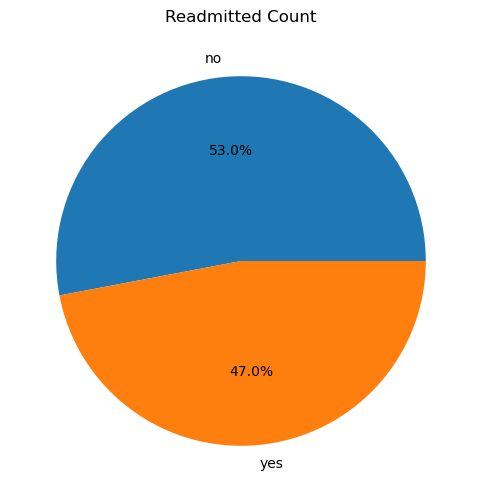

In [53]:
counts = df['readmitted'].value_counts()

labels = counts.index.tolist()
values = counts.values.tolist()
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Readmitted Count')
plt.show()

It is clearly visible that nearly half (47%) of the patients were readmitted to hospitals.

#### Feature selection

In [92]:
df_feature = df.copy()

In [94]:
df_feature.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80],8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80],3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60],5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80],2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70],1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [96]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

For feature selection we will first convert categorical features into numerical.

In [95]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [97]:
# define the columns to be encoded
columns_to_encode = ['medical_specialty', 'diag_1', 'diag_2', 'diag_3']

# instantiate the LabelEncoder
le = LabelEncoder()

# encode each column
for col in columns_to_encode:
    df_feature[col] = le.fit_transform(df_feature[col].astype(str))

In [99]:
df_feature.sample(5)

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
14734,[80-90],9,46,0,15,0,1,0,4,6,6,6,no,high,no,yes,no
8817,[70-80],5,14,0,1,0,0,0,1,6,6,6,no,no,no,no,no
12864,[60-70],4,47,1,14,0,0,0,3,6,6,0,no,high,yes,yes,yes
23845,[60-70],7,77,1,17,0,2,1,6,6,0,6,no,no,yes,yes,yes
4425,[80-90],3,28,0,14,10,0,0,4,6,6,6,no,no,yes,yes,yes


In [100]:
Glucose_test = pd.get_dummies(df_feature['glucose_test'])
Glucose_test

,high,no,normal
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
24995,0,1,0
24996,0,1,0
24997,0,0,1
24998,0,1,0


In [101]:
A1C_test = pd.get_dummies(df_feature['A1Ctest'])
A1C_test 

,high,no,normal
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
24995,0,0,1
24996,1,0,0
24997,0,1,0
24998,0,1,0


In [102]:
df_feature = df_feature.drop(['glucose_test','A1Ctest'], axis=1)

In [103]:
df_feature

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,change,diabetes_med,readmitted
0,[70-80],8,72,1,18,2,0,0,4,0,7,6,no,yes,no
1,[70-80],3,34,2,13,0,0,0,5,6,6,6,no,yes,no
2,[50-60],5,45,0,18,0,0,0,4,0,0,0,yes,yes,yes
3,[70-80],2,36,0,12,1,0,0,4,0,6,1,yes,yes,yes
4,[60-70],1,42,0,7,0,0,0,3,6,0,7,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90],14,77,1,30,0,0,0,4,0,6,0,no,no,yes
24996,[80-90],2,66,0,24,0,0,0,4,2,3,6,yes,yes,yes
24997,[70-80],5,12,0,6,0,1,0,4,6,6,6,no,no,yes
24998,[70-80],2,61,3,15,0,0,0,2,7,1,6,yes,yes,no


In [104]:
df_feature = pd.concat([df_feature,Glucose_test,A1C_test], axis=1)
df_feature.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,...,diag_3,change,diabetes_med,readmitted,high,no,normal,high,no,normal
0,[70-80],8,72,1,18,2,0,0,4,0,...,6,no,yes,no,0,1,0,0,1,0
1,[70-80],3,34,2,13,0,0,0,5,6,...,6,no,yes,no,0,1,0,0,1,0
2,[50-60],5,45,0,18,0,0,0,4,0,...,0,yes,yes,yes,0,1,0,0,1,0
3,[70-80],2,36,0,12,1,0,0,4,0,...,1,yes,yes,yes,0,1,0,0,1,0
4,[60-70],1,42,0,7,0,0,0,3,6,...,7,no,yes,no,0,1,0,0,1,0


In [105]:
#converting 'yes' or 'no' to binary values 1 or 0 respectively.
var_list=['change', 'diabetes_med', 'readmitted']

In [106]:
def binary_map(s):
    return s.map({'yes':1,'no':0})

In [107]:
df_feature[var_list] = df_feature[var_list].apply(binary_map)

In [108]:
df_feature

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,...,diag_3,change,diabetes_med,readmitted,high,no,normal,high,no,normal
0,[70-80],8,72,1,18,2,0,0,4,0,...,6,0,1,0,0,1,0,0,1,0
1,[70-80],3,34,2,13,0,0,0,5,6,...,6,0,1,0,0,1,0,0,1,0
2,[50-60],5,45,0,18,0,0,0,4,0,...,0,1,1,1,0,1,0,0,1,0
3,[70-80],2,36,0,12,1,0,0,4,0,...,1,1,1,1,0,1,0,0,1,0
4,[60-70],1,42,0,7,0,0,0,3,6,...,7,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90],14,77,1,30,0,0,0,4,0,...,0,0,0,1,0,1,0,0,0,1
24996,[80-90],2,66,0,24,0,0,0,4,2,...,6,1,1,1,0,1,0,1,0,0
24997,[70-80],5,12,0,6,0,1,0,4,6,...,6,0,0,1,0,0,1,0,1,0
24998,[70-80],2,61,3,15,0,0,0,2,7,...,6,1,1,0,0,1,0,0,1,0


In [109]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  int32 
 9   diag_1             25000 non-null  int32 
 10  diag_2             25000 non-null  int32 
 11  diag_3             25000 non-null  int32 
 12  change             25000 non-null  int64 
 13  diabetes_med       25000 non-null  int64 
 14  readmitted         25000 non-null  int64 
 15  high               25000 non-null  uint8 
 16  no                 25000 non-null  uint8

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [111]:
column_list = df_feature.columns.tolist()
print(column_list)

['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'change', 'diabetes_med', 'readmitted', 'high', 'no', 'normal', 'high', 'no', 'normal']


<AxesSubplot:>

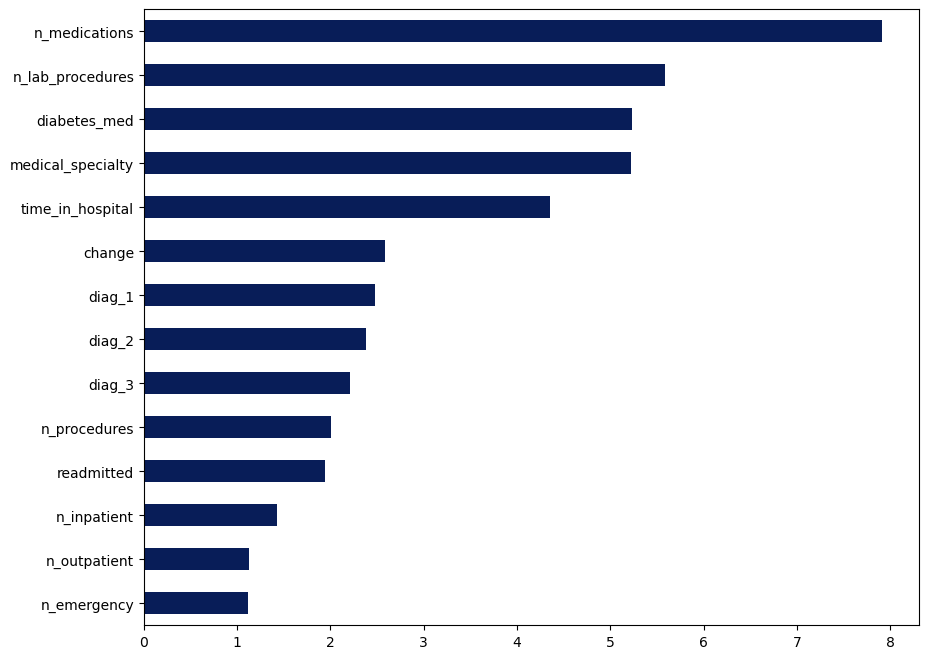

In [113]:
# checking multi co-linearity
_ = df_feature[['time_in_hospital', 'n_lab_procedures', 'n_procedures', 
                'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency', 
                'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'change', 'diabetes_med', 
                'readmitted']]
vif_lst = []
for i in range(_.shape[1]):
    vif = variance_inflation_factor(_.to_numpy(),i)
    vif_lst.append(vif)
s1 = pd.Series(vif_lst, index = _.columns)
s1.sort_values().plot(kind = "barh", cmap = "YlGnBu_r")

All these features can be used to build our model.

#### Model Building

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score

#### Logistic Regression

In [117]:
x = df_feature.drop(['age','readmitted'],axis=1)
x

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,change,diabetes_med,high,no,normal,high,no,normal
0,8,72,1,18,2,0,0,4,0,7,6,0,1,0,1,0,0,1,0
1,3,34,2,13,0,0,0,5,6,6,6,0,1,0,1,0,0,1,0
2,5,45,0,18,0,0,0,4,0,0,0,1,1,0,1,0,0,1,0
3,2,36,0,12,1,0,0,4,0,6,1,1,1,0,1,0,0,1,0
4,1,42,0,7,0,0,0,3,6,0,7,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,14,77,1,30,0,0,0,4,0,6,0,0,0,0,1,0,0,0,1
24996,2,66,0,24,0,0,0,4,2,3,6,1,1,0,1,0,1,0,0
24997,5,12,0,6,0,1,0,4,6,6,6,0,0,0,0,1,0,1,0
24998,2,61,3,15,0,0,0,2,7,1,6,1,1,0,1,0,0,1,0


In [118]:
y = df_feature['readmitted']
y

0        0
1        0
2        1
3        1
4        0
        ..
24995    1
24996    1
24997    1
24998    0
24999    1
Name: readmitted, Length: 25000, dtype: int64

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [120]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [121]:
# Make predictions on the test data
y_pred = model.predict(x_test)

In [122]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6032


In [123]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.81      0.68      2586
           1       0.65      0.38      0.48      2414

    accuracy                           0.60      5000
   macro avg       0.62      0.60      0.58      5000
weighted avg       0.62      0.60      0.58      5000



In [124]:
metrics.confusion_matrix(y_test, y_pred)

array([[2099,  487],
       [1497,  917]], dtype=int64)

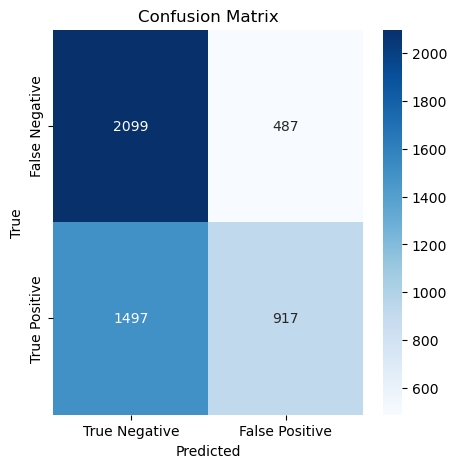

In [126]:
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=['True Negative','False Positive'], 
            yticklabels=['False Negative','True Positive'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### AUC-ROC

In [127]:
from sklearn.metrics import roc_auc_score, roc_curve

In [128]:
# Predict the probability of positive class
y_score = model.predict_proba(x_test)[:, 1]

<Figure size 600x400 with 0 Axes>

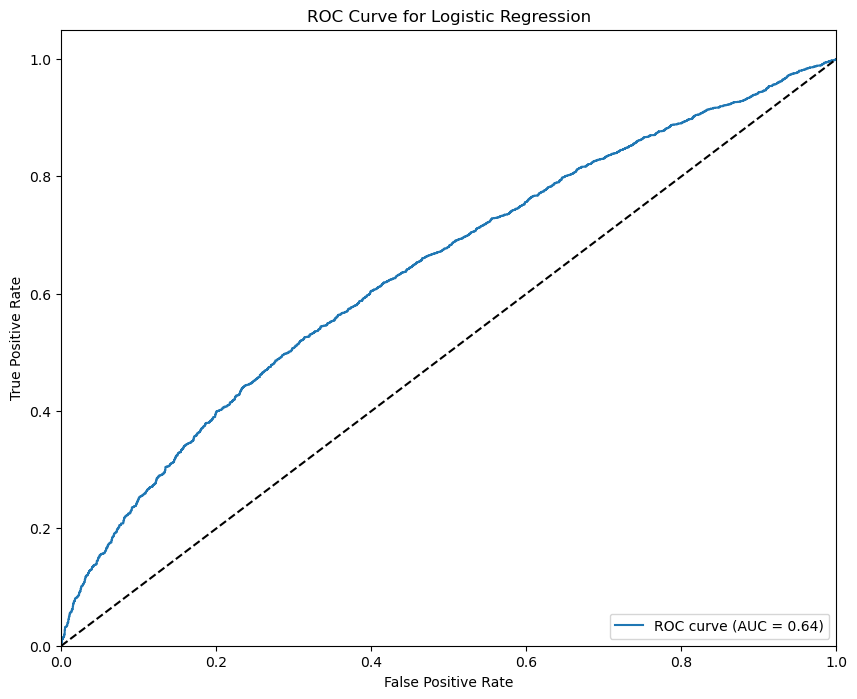

In [131]:
plt.figure(figsize=(6, 4))
# Calculate the ROC curve and the AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

#### Random Forest

In [132]:
xrf_train,xrf_test,yrf_train,yrf_test = train_test_split(x, y,test_size=0.2)

In [133]:
model_xrf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_xrf.fit(xrf_train,yrf_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [134]:
yrf_predict = model_xrf.predict(xrf_test)
model_score_r = model_xrf.score(xrf_test, yrf_test)

In [135]:
model_score_r

0.6242

In [136]:
print(metrics.classification_report(yrf_test, yrf_predict))

              precision    recall  f1-score   support

           0       0.62      0.74      0.68      2652
           1       0.63      0.49      0.55      2348

    accuracy                           0.62      5000
   macro avg       0.63      0.62      0.61      5000
weighted avg       0.62      0.62      0.62      5000



In [137]:
print(metrics.confusion_matrix(yrf_test, yrf_predict))

[[1975  677]
 [1202 1146]]


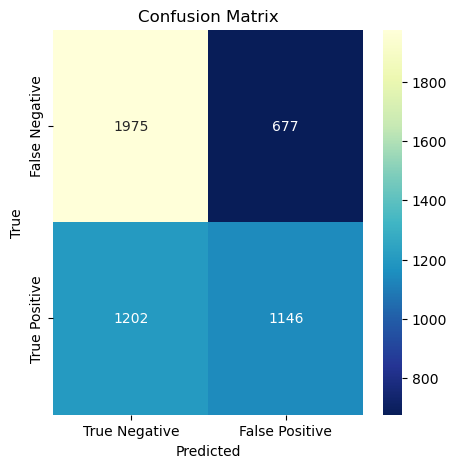

In [138]:
conf_mat = confusion_matrix(yrf_test, yrf_predict)

plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu_r", fmt='d',
            xticklabels=['True Negative','False Positive'], 
            yticklabels=['False Negative','True Positive'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [139]:
# Define parameters: these will need to be tuned to prevent overfitting and underfitting
params = {
    "n_estimators": 97,  # Number of trees in the forest
    "max_depth": 10,  # Max depth of the tree
    "min_samples_split": 3,  # Min number of samples required to split a node
    "min_samples_leaf": 1,  # Min number of samples required at a leaf node
    "ccp_alpha": 0,  # Cost complexity parameter for pruning
    "random_state": 123,
}

In [141]:
rf = RandomForestClassifier(**params)

# Train the random forest on the train set
rf = rf.fit(xrf_train, yrf_train)

# Predict the outcomes on the test set
yrf_pred = rf.predict(xrf_test)

In [144]:
yrf_pred = rf.predict(xrf_test)
print('Training Set:', rf.score(xrf_train,yrf_train))
print('Test Set:', rf.score(xrf_test,yrf_test))

# Calculate the accuracy, precision, and recall scores
print("Accuracy:", "{:.2f}%".format(accuracy_score(yrf_test, yrf_pred)*100))
print("Precision:", "{:.2f}%".format(precision_score(yrf_test, yrf_pred)*100))
print("Recall:", "{:.2f}%".format(recall_score(yrf_test, yrf_pred)*100))
print("Area Under the Curve:", "{:.2f}%".format(roc_auc_score(yrf_test, yrf_pred)*100))

Training Set: 0.6828
Test Set: 0.6222
Accuracy: 62.22%
Precision: 62.69%
Recall: 48.30%
Area Under the Curve: 61.42%


#### Gradient Boosting

In [145]:
from sklearn.ensemble import GradientBoostingClassifier

In [147]:
xgb_train,xgb_test,ygb_train,ygb_test = train_test_split(x,y,test_size=0.2)

In [148]:
# Define Gradient Boosting Classifier with hyperparameters
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

# Fit train data to GBC
gbc.fit(xgb_train,ygb_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [149]:
# Accuracy of model

print("Gradient Boost accuracy is %2.2f" % accuracy_score( 
     ygb_test, gbc.predict(xgb_test)))

Gradient Boost accuracy is 0.63


In [150]:
pred=gbc.predict(xgb_test)
print(classification_report(ygb_test, pred))

              precision    recall  f1-score   support

           0       0.62      0.76      0.69      2667
           1       0.64      0.48      0.54      2333

    accuracy                           0.63      5000
   macro avg       0.63      0.62      0.62      5000
weighted avg       0.63      0.63      0.62      5000



In [151]:
print(confusion_matrix(ygb_test, gbc.predict(xgb_test)))

[[2036  631]
 [1224 1109]]


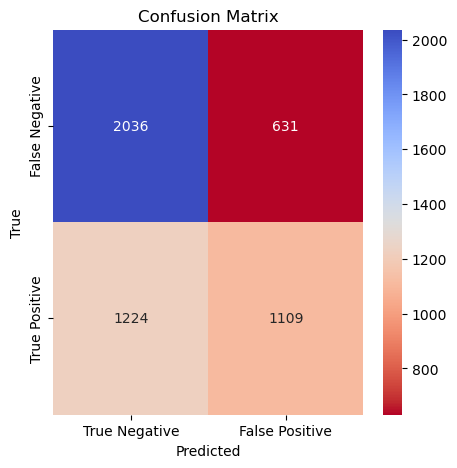

In [152]:
conf_mat = confusion_matrix(ygb_test, gbc.predict(xgb_test))

plt.figure(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm_r", fmt='d',
            xticklabels=['True Negative','False Positive'], 
            yticklabels=['False Negative','True Positive'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [153]:
# Predict the probability of positive class
y_score = model.predict_proba(xgb_test)[:, 1]

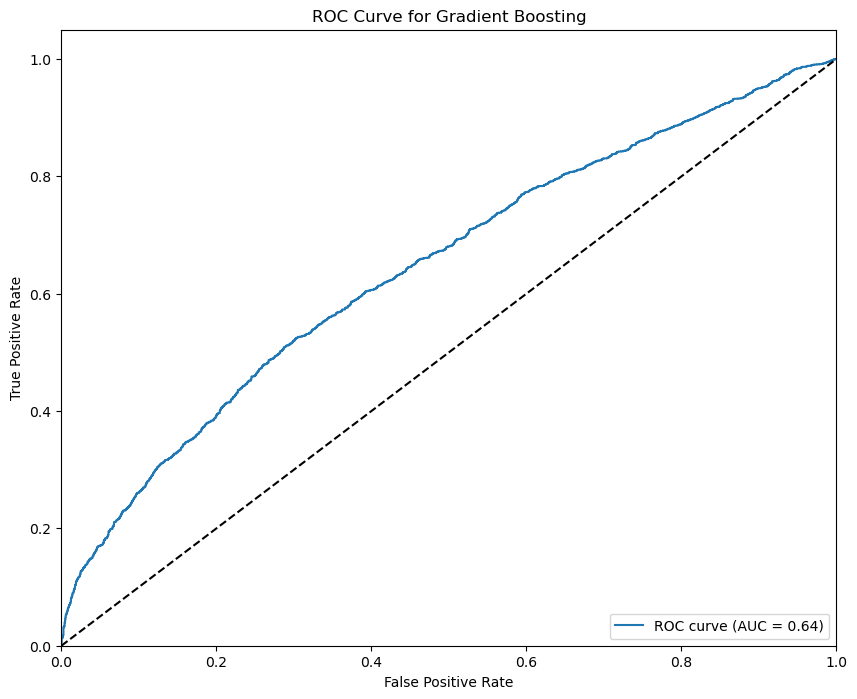

In [154]:
# Calculate the ROC curve and the AUC
fpr, tpr, _ = roc_curve(ygb_test, y_score)
roc_auc = roc_auc_score(ygb_test, y_score)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

#### Model's performance using cross-validation

Cross-validation is a technique for evaluating the performance of a machine learning model by splitting the data into multiple folds, training the model on a portion of the data, and evaluating it on the remaining portion.

In [155]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [156]:
kfold = KFold(n_splits=10, shuffle= True, random_state=42)

In [157]:
scores = cross_val_score(gbc,xgb_train,ygb_train, cv=kfold)

In [158]:
print("Model Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

Model Accuracy: 61.68% (1.19%)


#### Random search technique for hyperparameter tuning

In [159]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

In [160]:
# Define the hyperparameter search space
param_dist = {'learning_rate': uniform(0.01, 1.0),
              'n_estimators': range(50, 500),
              'max_depth': range(1, 11),
              'min_samples_split': range(2, 21),
              'min_samples_leaf': range(1, 21),
              'subsample': uniform(0.01, 1.0)}

# Perform random search with 5-fold cross-validation
random_search = RandomizedSearchCV(gbc, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1)
random_search.fit(xgb_train,ygb_train)

# Print the best hyperparameters found
print("Best parameters:", random_search.best_params_)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 317, in _check_params
    raise ValueError("subsample must be in (0,1] but was %r" % self.subsample)
Value

Best parameters: {'learning_rate': 0.02617326516972817, 'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 14, 'n_estimators': 438, 'subsample': 0.319156482067235}


In [161]:
accuracy = accuracy_score(ygb_test, pred)

In [162]:
print('Accuracy:',accuracy)

Accuracy: 0.629
